In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\Yash\\OneDrive\\Desktop\\Datasets and completed analysis\\Datasets\\spotify-2023.csv", encoding='latin1',on_bad_lines='skip')

In [4]:
df_cleaned = df.drop(columns=['track_name', 'artist(s)_name'])
cols_to_clean = ['in_spotify_playlists', 'streams', 'in_apple_playlists','in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

In [5]:
for col in cols_to_clean:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].str.replace(',', '', regex=False)
cols_to_convert = [col for col in df_cleaned.columns if col not in ['key', 'mode']]

In [6]:
for col in cols_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [7]:
df_cleaned.dropna(inplace=True)

In [8]:
X= df_cleaned.drop('in_spotify_charts', axis=1)
target = df_cleaned['in_spotify_charts'].value_counts()
classes_to_remove = target[target < 2].index
df_final = df_cleaned[~df_cleaned['in_spotify_charts'].isin(classes_to_remove)]

In [13]:
X = df_final.drop('in_spotify_charts', axis=1)
y = df_final['in_spotify_charts']
print(f"4. Shape of features: {X.shape} | Shape of target: {target.shape}")

4. Shape of features: (795, 21) | Shape of target: (76,)


In [15]:
le = LabelEncoder()
if 'key' in X.columns:
    X['key'] = le.fit_transform(X['key'])
if 'mode' in X.columns:
    X['mode'] = le.fit_transform(X['mode'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

In [19]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 41.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.89      0.69       104
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         5
           4       0.17      0.25      0.20        12
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00

Text(0.5, 1.0, 'Decision Tree for Spotify Chart Prediction')

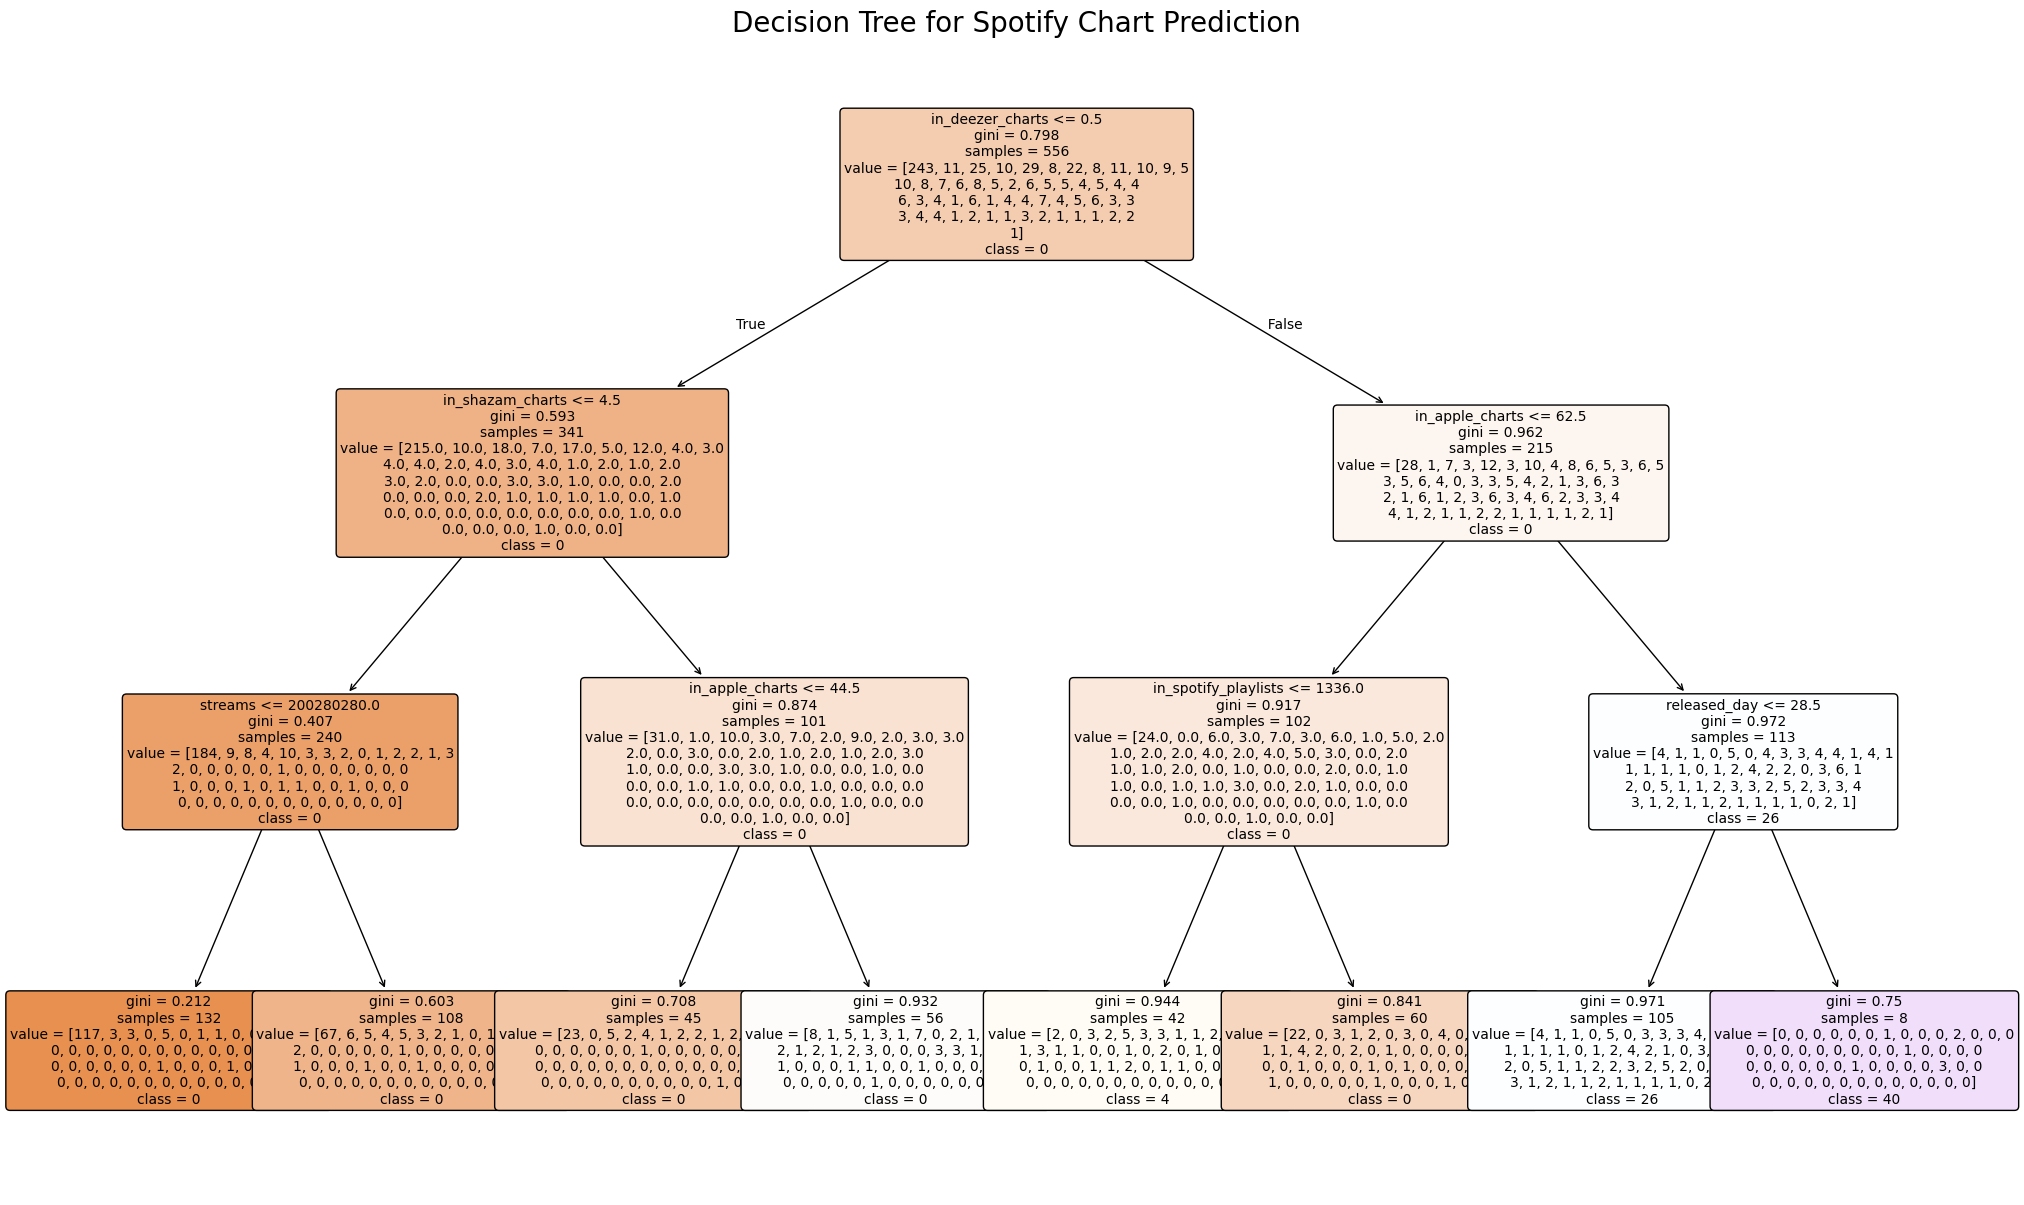

In [23]:
plt.figure(figsize=(25, 15))
plot_tree(dt_model,feature_names=X.columns,class_names=[str(int(c)) for c in dt_model.classes_],filled=True,rounded=True,fontsize=10)
plt.title("Decision Tree for Spotify Chart Prediction", fontsize=20)